In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [3]:
from sklearn.datasets import make_moons

In [25]:
data, target = make_moons(n_samples=500, noise=0.2)

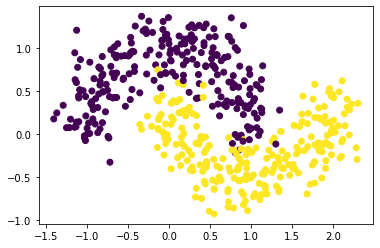

In [26]:
plt.scatter(data[:,0], data[:,1], c=target)
plt.show()

In [27]:
target[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [28]:
def plot_boundary(pred):
    x1 = np.arange(min(data[:,0]) - 1, max(data[:,0]) + 1, 0.01)
    x2 = np.arange(min(data[:,1]) - 1, max(data[:,1]) + 1, 0.01)
    
    xx,yy = np.meshgrid(x1, x2)
    
    X = np.array([xx.flatten(), yy.flatten()]).T
    z = pred(X)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx,yy,z)
    plt.scatter(data[:,0], data[:,1], c=target,
               cmap=ListedColormap(('white', 'red')))
    plt.show()

In [29]:
logistic = LogisticRegression()
logistic.fit(data, target)

LogisticRegression()

In [30]:
y_pred_log = logistic.predict(data)
accuracy_score(target, y_pred_log)

0.87

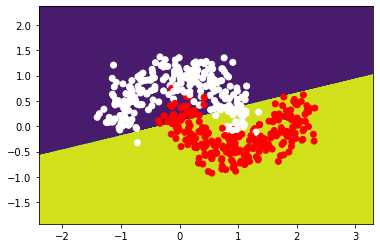

In [31]:
plot_boundary(lambda x : logistic.predict(x))

In [35]:
svc = SVC(kernel='linear')
svc.fit(data, target)

SVC(kernel='linear')

In [36]:
y_pred_svc = svc.predict(data)
accuracy_score(target, y_pred_svc)

0.868

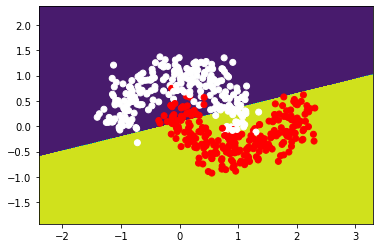

In [37]:
plot_boundary(lambda x : svc.predict(x))

In [38]:
# svc.decision_function()